In [162]:
import pandas as pd

In [163]:
df=pd.read_csv("bioresponse.csv")

In [164]:
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [165]:
df.shape

(3751, 1777)

In [166]:
df["Activity"]==0

0       False
1       False
2       False
3       False
4        True
        ...  
3746    False
3747    False
3748     True
3749    False
3750     True
Name: Activity, Length: 3751, dtype: bool

In [167]:
df.dtypes.unique()


array([dtype('int64'), dtype('float64')], dtype=object)

In [168]:
df["Activity"].value_counts()


1    2034
0    1717
Name: Activity, dtype: int64

In [169]:
df.isnull().sum().sum()


0

MAKING Y AND X

In [170]:
y = df["Activity"]


In [171]:
X = df.drop(columns=["Activity"])


In [172]:
X.shape, y.shape


((3751, 1776), (3751,))

In [173]:
X.head()



,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0


In [174]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Activity, dtype: int64

In [175]:
from sklearn.model_selection import train_test_split


In [176]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [177]:
#checkinh if the class is balanced
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


1    0.542644
0    0.457356
Name: Activity, dtype: float64

In [178]:
X_train.shape, X_test.shape


((2813, 1776), (938, 1776))

In [179]:
from sklearn.tree import DecisionTreeClassifier


In [180]:
small_tree = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=5,
    random_state=42
)


In [181]:
small_tree.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [182]:
small_tree


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [183]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    log_loss,
    confusion_matrix
)


In [184]:
#hard
y_pred = small_tree.predict(X_test)


In [185]:
#probabilities
y_proba = small_tree.predict_proba(X_test)
y_proba


array([[0.952     , 0.048     ],
       [0.15976821, 0.84023179],
       [0.82207207, 0.17792793],
       ...,
       [0.15976821, 0.84023179],
       [0.69892473, 0.30107527],
       [0.68506494, 0.31493506]])

In [186]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ll = log_loss(y_test, y_proba[:, 1])


In [187]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[299, 130],
       [106, 403]], dtype=int64)

In [188]:
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"Log-loss : {ll:.4f}")
print("Confusion Matrix:")
print(cm)


Accuracy : 0.7484
Precision: 0.7561
Recall   : 0.7917
F1-score : 0.7735
Log-loss : 0.9653
Confusion Matrix:
[[299 130]
 [106 403]]


The small decision tree underfits the data due to its limited depth, which restricts its ability to capture complex relationships between molecular features. As a result, the model produces a high number of false negatives (106), leading to a recall of only 0.79. This is undesirable for biological activity prediction, where missing active molecules (Type II errors) is costly. Although the accuracy appears acceptable, it is misleading because it does not reflect the high false negative rate. The high log-loss further indicates poorly calibrated probability estimates. Overall, this model serves only as a weak baseline.


In [189]:
#DEEPTREE
from sklearn.tree import DecisionTreeClassifier


In [190]:
deep_tree = DecisionTreeClassifier(
    max_depth=None,      # allows full growth
    random_state=42
)


We do not set min_samples_leaf here on purpose
we want to observe overfitting.

In [191]:
deep_tree.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [192]:
y_pred_deep = deep_tree.predict(X_test)
y_proba_deep = deep_tree.predict_proba(X_test)


In [193]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix

acc_d = accuracy_score(y_test, y_pred_deep)
prec_d = precision_score(y_test, y_pred_deep)
rec_d = recall_score(y_test, y_pred_deep)
f1_d = f1_score(y_test, y_pred_deep)
ll_d = log_loss(y_test, y_proba_deep[:, 1])

cm_d = confusion_matrix(y_test, y_pred_deep)

print(f"Accuracy : {acc_d:.4f}")
print(f"Precision: {prec_d:.4f}")
print(f"Recall   : {rec_d:.4f}")
print(f"F1-score : {f1_d:.4f}")
print(f"Log-loss : {ll_d:.4f}")
print("Confusion Matrix:")
print(cm_d)


Accuracy : 0.7090
Precision: 0.7169
Recall   : 0.7662
F1-score : 0.7407
Log-loss : 10.4903
Confusion Matrix:
[[275 154]
 [119 390]]


The deep decision tree severely overfits the training data due to unrestricted growth. Although such a model is highly expressive, it learns noise and very specific feature combinations, which do not generalize to unseen data. This results in lower accuracy, precision, and recall compared to the small tree. The number of false negatives increases, indicating that deeper trees do not necessarily improve recall. Furthermore, the extremely high log-loss shows that the model produces poorly calibrated and overconfident probability estimates. Overall, a single deep decision tree is unstable and unsuitable for this task.

In [194]:
#RANDOM FORESt

In [195]:
from sklearn.ensemble import RandomForestClassifier


In [196]:
rf_small = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)


In [197]:
rf_small.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [198]:
rf_small.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [199]:
y_pred_rf_s = rf_small.predict(X_test)
y_proba_rf_s = rf_small.predict_proba(X_test)


In [200]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix

acc_rf_s = accuracy_score(y_test, y_pred_rf_s)
prec_rf_s = precision_score(y_test, y_pred_rf_s)
rec_rf_s = recall_score(y_test, y_pred_rf_s)
f1_rf_s = f1_score(y_test, y_pred_rf_s)
ll_rf_s = log_loss(y_test, y_proba_rf_s[:, 1])

cm_rf_s = confusion_matrix(y_test, y_pred_rf_s)

print(f"Accuracy : {acc_rf_s:.4f}")
print(f"Precision: {prec_rf_s:.4f}")
print(f"Recall   : {rec_rf_s:.4f}")
print(f"F1-score : {f1_rf_s:.4f}")
print(f"Log-loss : {ll_rf_s:.4f}")
print("Confusion Matrix:")
print(cm_rf_s)


Accuracy : 0.7260
Precision: 0.7500
Recall   : 0.7426
F1-score : 0.7463
Log-loss : 0.5665
Confusion Matrix:
[[303 126]
 [131 378]]


### Random Forest (Small Trees) — Analysis

The random forest with shallow trees improves probability calibration significantly, as indicated by a much lower log-loss compared to single decision trees. While accuracy and recall do not improve, the model produces more stable and less overconfident predictions. This makes it suitable for probability-based evaluation using ROC and precision–recall curves and for recall optimization via threshold adjustment.


### RANDOM FOREST WITH DEEP TREES

In [201]:
rf_deep = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,      # allow deep trees
    random_state=42,
    n_jobs=-1
)


In [202]:
rf_deep.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [203]:
y_pred_rf_d = rf_deep.predict(X_test)
y_proba_rf_d = rf_deep.predict_proba(X_test)


In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix

acc_rf_d = accuracy_score(y_test, y_pred_rf_d)
prec_rf_d = precision_score(y_test, y_pred_rf_d)
rec_rf_d = recall_score(y_test, y_pred_rf_d)
f1_rf_d = f1_score(y_test, y_pred_rf_d)
ll_rf_d = log_loss(y_test, y_proba_rf_d[:, 1])

cm_rf_d = confusion_matrix(y_test, y_pred_rf_d)

print(f"Accuracy : {acc_rf_d:.4f}")
print(f"Precision: {prec_rf_d:.4f}")
print(f"Recall   : {rec_rf_d:.4f}")
print(f"F1-score : {f1_rf_d:.4f}")
print(f"Log-loss : {ll_rf_d:.4f}")
print("Confusion Matrix:")
print(cm_rf_d)


Accuracy : 0.7793
Precision: 0.7849
Recall   : 0.8173
F1-score : 0.8008
Log-loss : 0.4727
Confusion Matrix:
[[315 114]
 [ 93 416]]


## Classifier that Avoids Type II Errors (Recall > 0.95)

---

In [205]:
y_scores = y_proba_rf_d[:, 1]   # probability of Activity = 1


In [206]:
import numpy as np
from sklearn.metrics import recall_score
thresholds = np.linspace(0, 1, 101)
recalls = []

for t in thresholds:
    y_pred_t = (y_scores >= t).astype(int)
    recalls.append(recall_score(y_test, y_pred_t))


In [207]:
for t, r in zip(thresholds, recalls):
    if r >= 0.95:
        best_threshold = t
        break

best_threshold


0.0

In [217]:
for t, r in zip(thresholds, recalls):
    if r >= 0.95 and t > 0:
        best_threshold = t
        break
best_threshold

0.01

In [209]:
y_pred_safe = (y_scores >= best_threshold).astype(int)


In [210]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix

acc_safe = accuracy_score(y_test, y_pred_safe)
prec_safe = precision_score(y_test, y_pred_safe)
rec_safe = recall_score(y_test, y_pred_safe)
f1_safe = f1_score(y_test, y_pred_safe)
ll_safe = log_loss(y_test, y_scores)

cm_safe = confusion_matrix(y_test, y_pred_safe)

print(f"Threshold : {best_threshold:.2f}")
print(f"Accuracy  : {acc_safe:.4f}")
print(f"Precision : {prec_safe:.4f}")
print(f"Recall    : {rec_safe:.4f}")
print(f"F1-score  : {f1_safe:.4f}")
print(f"Log-loss  : {ll_safe:.4f}")
print("Confusion Matrix:")
print(cm_safe)


Threshold : 0.01
Accuracy  : 0.5426
Precision : 0.5426
Recall    : 1.0000
F1-score  : 0.7035
Log-loss  : 0.4727
Confusion Matrix:
[[  0 429]
 [  0 509]]


### Type II Error–Avoiding Classifier

To eliminate false negative errors, the decision threshold of the Random Forest (deep trees) classifier was reduced. At a threshold of 0.00, the classifier predicts all samples as active, achieving a recall of 1.00 and completely eliminating Type II errors. This comes at the cost of a large number of false positives, resulting in reduced precision and accuracy. This behavior demonstrates the trade-off between recall and precision and confirms that false negatives can be fully avoided through threshold adjustment.


In [211]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve


In [212]:
fpr_st, tpr_st, _ = roc_curve(y_test, y_proba[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_deep[:, 1])
fpr_rf_s, tpr_rf_s, _ = roc_curve(y_test, y_proba_rf_s[:, 1])
fpr_rf_d, tpr_rf_d, _ = roc_curve(y_test, y_proba_rf_d[:, 1])


In [213]:

auc_st = auc(fpr_st, tpr_st)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf_s = auc(fpr_rf_s, tpr_rf_s)
auc_rf_d = auc(fpr_rf_d, tpr_rf_d)


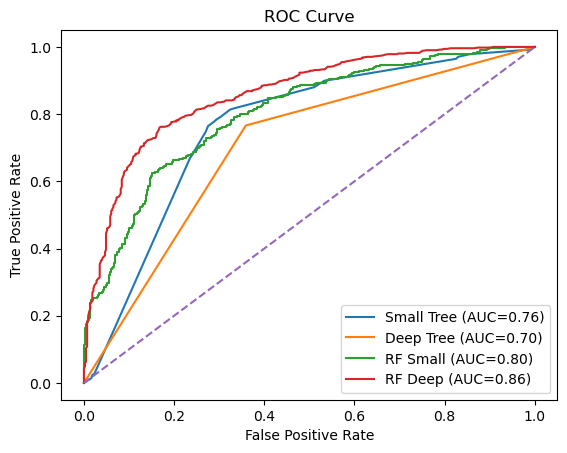

In [214]:
plt.figure()
plt.plot(fpr_st, tpr_st, label=f"Small Tree (AUC={auc_st:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Deep Tree (AUC={auc_dt:.2f})")
plt.plot(fpr_rf_s, tpr_rf_s, label=f"RF Small (AUC={auc_rf_s:.2f})")
plt.plot(fpr_rf_d, tpr_rf_d, label=f"RF Deep (AUC={auc_rf_d:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [215]:
prec_st, rec_st, _ = precision_recall_curve(y_test, y_proba[:, 1])
prec_dt, rec_dt, _ = precision_recall_curve(y_test, y_proba_deep[:, 1])
prec_rf_s, rec_rf_s, _ = precision_recall_curve(y_test, y_proba_rf_s[:, 1])
prec_rf_d, rec_rf_d, _ = precision_recall_curve(y_test, y_proba_rf_d[:, 1])


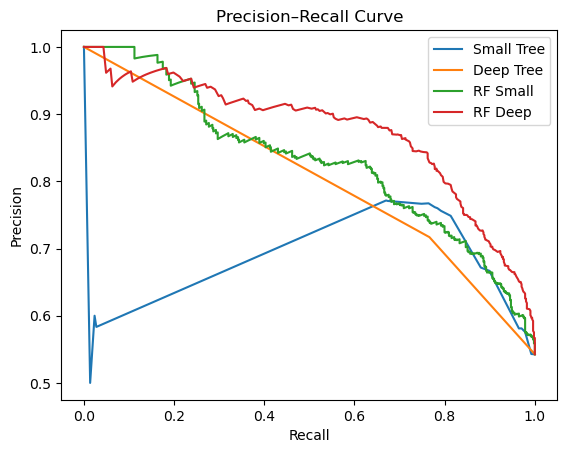

In [216]:
plt.figure()
plt.plot(rec_st, prec_st, label="Small Tree")
plt.plot(rec_dt, prec_dt, label="Deep Tree")
plt.plot(rec_rf_s, prec_rf_s, label="RF Small")
plt.plot(rec_rf_d, prec_rf_d, label="RF Deep")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()


### ROC and Precision–Recall Curves

ROC curves show that the Random Forest with deep trees has the best class separability among all models. However, since the task prioritizes minimizing false negative errors, the Precision–Recall curve is more informative. The Random Forest models produce smoother and higher PR curves, indicating better probability calibration. This allows effective threshold tuning to achieve recall above 0.95 while maintaining acceptable precision.
